### A project by  shruti

### Importing Required Librarires

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


### Loading Data

In [10]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [11]:
df.head()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0               1.0  ...   
2                     0.0                        0.0               0.0  ...   
3                     1.0                        0.0               0.0  ...   
4                     1.0                        0.0               1.0  ...   

    race     sex               income_level  marital_status  housing_status  \
0  White  Female              Below Poverty     Not Married             Own   
1  White    Male              Below Poverty     Not Married            Rent   
2  White    Male  <= $75,000, Above Poverty     Not Married             Own   
3  White  Female              Below Poverty     Not Married            Rent   
4  White  Female  <= $75,000, Above Poverty         Married             Own   

           employment                census_msa  no_of_adults  no_of_children  \
0  Not in Labor Force                   Non-MSA           0.0             0.0   
1            Employed  MSA, Not Principle  City           0.0             0.0   
2            Employed  MSA, Not Principle  City           2.0             0.0   
3  Not in Labor Force       MSA, Principle City           0.0             0.0   
4            Employed  MSA, Not Principle  City           1.0             0.0   

   h1n1_vaccine  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 34 columns]

In [12]:
# Variable for number of models used
count = 0

sc1tr= sc2tr= sc3tr= sc4tr= sc5tr= sc6tr= sc7tr= sc8tr= sc9tr= sc10tr= sc11tr= sc12tr= sc13tr = 0
sc1ts= sc2ts= sc3ts= sc4ts= sc5ts= sc6ts= sc7ts= sc8ts = sc9ts= sc10ts= sc11ts= sc12ts= sc13ts = 0

<p>Notes: </p>
<ol>
<li>The model can be run on both scaled and unscaled data by just commenting/uncommenting train_test_split.</li>
<li>You can exclude a model by just commenting its code and output wont be affected.</li>
</ol>

### Exploratory Data Analysis

### 1) Numerical Analysis

In [13]:
# df.drop('Unnamed: 0', axis= 1, inplace= True)

In [14]:
df.shape

(26707, 34)

In [15]:
df.describe(include= 'all').T

count unique                        top   freq  \
unique_id                  26707.0    NaN                        NaN    NaN   
h1n1_worry                 26615.0    NaN                        NaN    NaN   
h1n1_awareness             26591.0    NaN                        NaN    NaN   
antiviral_medication       26636.0    NaN                        NaN    NaN   
contact_avoidance          26499.0    NaN                        NaN    NaN   
bought_face_mask           26688.0    NaN                        NaN    NaN   
wash_hands_frequently      26665.0    NaN                        NaN    NaN   
avoid_large_gatherings     26620.0    NaN                        NaN    NaN   
reduced_outside_home_cont  26625.0    NaN                        NaN    NaN   
avoid_touch_face           26579.0    NaN                        NaN    NaN   
dr_recc_h1n1_vacc          24547.0    NaN                        NaN    NaN   
dr_recc_seasonal_vacc      24547.0    NaN                        NaN    NaN   
chronic_medic_condition    25736.0    NaN                        NaN    NaN   
cont_child_undr_6_mnths    25887.0    NaN                        NaN    NaN   
is_health_worker           25903.0    NaN                        NaN    NaN   
has_health_insur           14433.0    NaN                        NaN    NaN   
is_h1n1_vacc_effective     26316.0    NaN                        NaN    NaN   
is_h1n1_risky              26319.0    NaN                        NaN    NaN   
sick_from_h1n1_vacc        26312.0    NaN                        NaN    NaN   
is_seas_vacc_effective     26245.0    NaN                        NaN    NaN   
is_seas_risky              26193.0    NaN                        NaN    NaN   
sick_from_seas_vacc        26170.0    NaN                        NaN    NaN   
age_bracket                  26707      5                  65+ Years   6843   
qualification                25300      4           College Graduate  10097   
race                         26707      4                      White  21222   
sex                          26707      2                     Female  15858   
income_level                 22284      3  <= $75,000, Above Poverty  12777   
marital_status               25299      2                    Married  13555   
housing_status               24665      2                        Own  18736   
employment                   25244      3                   Employed  13560   
census_msa                   26707      3   MSA, Not Principle  City  11645   
no_of_adults               26458.0    NaN                        NaN    NaN   
no_of_children             26458.0    NaN                        NaN    NaN   
h1n1_vaccine               26707.0    NaN                        NaN    NaN   

                               mean          std  min     25%      50%  \
unique_id                   13353.0  7709.791156  0.0  6676.5  13353.0   
h1n1_worry                 1.618486     0.910311  0.0     1.0      2.0   
h1n1_awareness             1.262532     0.618149  0.0     1.0      1.0   
antiviral_medication       0.048844     0.215545  0.0     0.0      0.0   
contact_avoidance          0.725612     0.446214  0.0     0.0      1.0   
bought_face_mask           0.068982     0.253429  0.0     0.0      0.0   
wash_hands_frequently      0.825614     0.379448  0.0     1.0      1.0   
avoid_large_gatherings      0.35864      0.47961  0.0     0.0      0.0   
reduced_outside_home_cont  0.337315     0.472802  0.0     0.0      0.0   
avoid_touch_face           0.677264     0.467531  0.0     0.0      1.0   
dr_recc_h1n1_vacc          0.220312     0.414466  0.0     0.0      0.0   
dr_recc_seasonal_vacc      0.329735     0.470126  0.0     0.0      0.0   
chronic_medic_condition    0.283261     0.450591  0.0     0.0      0.0   
cont_child_undr_6_mnths     0.08259     0.275266  0.0     0.0      0.0   
is_health_worker           0.111918     0.315271  0.0     0.0      0.0   
has_health_insur            0.87972       0.3253  0.0     1.0      1.0   
is_h1

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [17]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

## 2) Data Visualiztion

### Univariate Analysis

###### Number of passengers

<AxesSubplot:xlabel='age_bracket', ylabel='Count'>

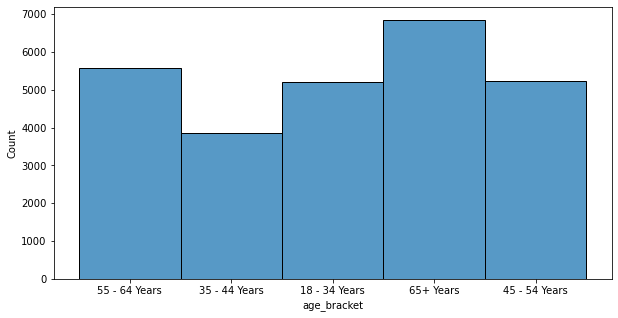

In [22]:
plt.figure(figsize = (10,5))

sns.histplot(x='age_bracket', data=df)

### Multivariate Analysis

<AxesSubplot:>

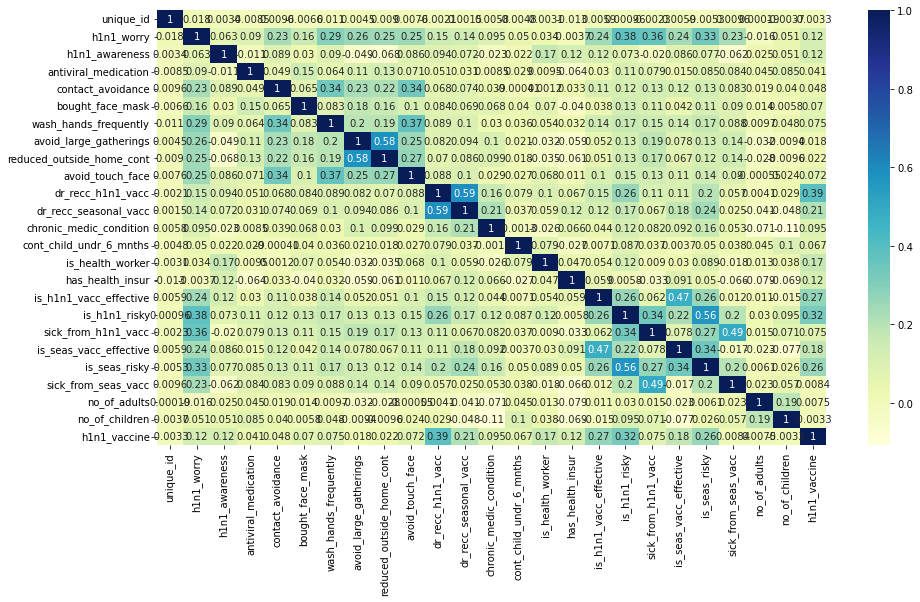

In [27]:
plt.figure(figsize = (15, 8))
corr = df.corr()
sns.heatmap(corr, annot=True,cmap="YlGnBu")

### Data Cleaning

##### 1) Missing Values

In [28]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

The dataset has no missing values.

##### 2) Duplicate Values

In [29]:
df.duplicated().sum()

0

The dataset has no duplicated rows.

In [30]:
lst = list(df.index)
lst.count(16396)
df.shape

(26707, 34)

#### Removing values with 0.00000 co-ordinates values

In [33]:
df.shape

(26707, 34)

In [28]:
df.shape

(49043, 8)

In [30]:
df.shape

(49000, 8)

In [35]:
df.shape

(26707, 34)

#### Approximating latitudes and longitudes

In [37]:
import copy

def approx_coordinates(df, column):
    df = copy.copy(df)
    df = df.sort_values([column])
    loop_counter = len(df[column]) - 1
    changed = 0
    
    for i in range(loop_counter):
        diff = df[column].loc[i+1] - df[column].loc[i]
        if(abs(diff) <= 0.000999):
            df[column].loc[i+1] = df[column].loc[i]
            changed = changed + 1
    print("Total Changed:", changed)
    
    return df[column]

##### 3) Removing outliers

In [39]:
import copy

def remove_outliers(df, column):
    # IQR
    Q1 = np.percentile(df[column], 25,
                    interpolation = 'midpoint')

    Q3 = np.percentile(df[column], 75,
                    interpolation = 'midpoint')
    IQR = Q3 - Q1

    print("Old Shape: ", df.shape)
    
    # Upper bound
    upper = np.where(df[column] >= (Q3+1.5*IQR))
    df.drop(upper[0], inplace= True)
    df.reset_index(inplace = True, drop = True)

     # Lower bound
    lower = np.where(df[column] <= (Q1-1.5*IQR))
    df.drop(lower[0], inplace= True)
    df.reset_index(inplace = True, drop = True)

    print("New Shape: ", df.shape)
    sns.boxplot(x=column, data=df)
    
    
    return df

Removing outliers for ususual locations

Outliers were not removed as the data is getting reduced significantly

Removing less frequent passenger numbers

In [40]:
df.shape

(26707, 34)

##### 4) Invalid Data

In [43]:
# There are some negative amount values

negative_amounts = np.where(df['contact_avoidance'] <= 0)
df.drop(negative_amounts[0], inplace= True)
df.reset_index(inplace = True, drop = True)

In [44]:
df.shape

(19436, 34)

### 3) Feature Engineering (Extracting time and day)

In [53]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [48]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

##### We drop unique_id column as it is not required.

In [51]:
df.head()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          1         3.0             2.0                   0.0   
1          2         1.0             1.0                   0.0   
2          3         1.0             1.0                   0.0   
3          4         2.0             1.0                   0.0   
4          5         3.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                1.0               0.0                    1.0   
1                1.0               0.0                    0.0   
2                1.0               0.0                    1.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        0.0               0.0  ...   
2                     1.0                        0.0               0.0  ...   
3                     1.0                        0.0               1.0  ...   
4                     0.0                        0.0               1.0  ...   

    race     sex               income_level  marital_status  housing_status  \
0  White    Male              Below Poverty     Not Married            Rent   
1  White    Male  <= $75,000, Above Poverty     Not Married             Own   
2  White  Female              Below Poverty     Not Married            Rent   
3  White  Female  <= $75,000, Above Poverty         Married             Own   
4  White    Male  <= $75,000, Above Poverty         Married             Own   

           employment                census_msa  no_of_adults  no_of_children  \
0            Employed  MSA, Not Principle  City           0.0             0.0   
1            Employed  MSA, Not Principle  City           2.0             0.0   
2  Not in Labor Force       MSA, Principle City           0.0             0.0   
3            Employed  MSA, Not Principle  City           1.0             0.0   
4            Employed       MSA, Principle City           2.0             3.0   

   h1n1_vaccine  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 34 columns]

### Extracting features and labels

In [54]:
X = df.drop('contact_avoidance', axis= 1)
y = df['contact_avoidance']

In [55]:
X.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

### Feature Scaling

In [58]:
X_transformed = pd.DataFrame(X_transformed, columns = ['longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger','month','day',
        'dayofweek', 'hour'])

NameError: name 'X_transformed' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler 

st_x = StandardScaler()  
X_transformed = st_x.fit_transform(X) 

In [ ]:
X_transformed.head()

In [60]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [61]:
y_arr = np.array(y).reshape(-1,1)
y_arr.shape
y = st_x.fit_transform(y_arr) 

In [62]:
y_transformed = pd.DataFrame(y, columns= ['contact_avoidance'])
y_transformed.head()

contact_avoidance
0                0.0
1                0.0
2                0.0
3                0.0
4                0.0

### Getting training and testing data

In [63]:
# Value of random state

rdst = 42

In [70]:
# Normal Data

#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.3, random_state= rdst)

In [71]:
#xtrain, xtest, ytrain, ytest = train_test_split(X_transformed, y_transformed, test_size= 0.2, random_state= rdst)

### Model Fitting

##### Here we will use Regression Model's because the target variable is numerical.

#### 1) Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(max_depth=6 , max_features='sqrt', random_state= rdst)
model1.fit(xtrain, ytrain)

In [84]:
sc1tr = model1.score(xtrain, ytrain)
sc1tr 

0.6027600079840413

In [85]:
sc1ts = model1.score(xtest, ytest)
sc1ts

0.5785505872336492

In [86]:
#adding values for performance report
count = count + 1

#### 2) SVM

In [87]:
count = count + 1

#### 3) SGD

In [ ]:
from sklearn.linear_model import SGDClassifier

model3 = SGDClassifier(random_state= rdst)
model3.fit(xtrain, ytrain)

In [89]:
sc3tr = model3.score(xtrain, ytrain)
sc3tr

-4.388767703702596e+21

In [90]:
sc3ts = model3.score(xtest, ytest)
sc3ts

-3.8864903064549715e+21

In [91]:
#adding values for performance report
count = count + 1

#### 4) Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

model4 = BaggingClassifier(base_estimator= model1,random_state= rdst)
model4.fit(xtrain, ytrain)

In [93]:
sc4tr = model4.score(xtrain, ytrain)
sc4tr

0.652308846406233

In [94]:
sc4ts = model4.score(xtest, ytest)
sc4ts

0.6336399295358104

In [95]:
#adding values for performance report
count = count + 1

#### 5) AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model5 = AdaBoostClassifier(random_state= rdst)
model5.fit(xtrain, ytrain)

In [97]:
sc5tr = model5.score(xtrain, ytrain)
sc5tr

-2.2272072831151832

In [98]:
sc5ts = model5.score(xtest, ytest)
sc5ts

-2.3303117860593052

In [99]:
#adding values for performance report
count = count + 1

#### 6) GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model6 = GradientBoostingClassifier(random_state= rdst)
model6.fit(xtrain, ytrain)

In [101]:
sc6tr = model6.score(xtrain, ytrain)
sc6tr

0.7726810383487652

In [102]:
sc6ts = model6.score(xtest, ytest)
sc6ts

0.7290197996595463

In [103]:
#adding values for performance report
count = count + 1

#### 7) RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model7 = RandomForestClassifier(n_jobs= 2, random_state= rdst, min_samples_split= 8, min_samples_leaf= 1)
model7.fit(xtrain, ytrain)

In [105]:
sc7tr = model7.score(xtrain, ytrain)
sc7tr

0.9337961111419366

In [106]:
sc7ts = model7.score(xtest, ytest)
sc7ts

0.7834731216316448

In [107]:
#adding values for performance report
count = count + 1

In [108]:
y_preds = model7

#### 8) Simple Linear Classification

In [ ]:
from sklearn.linear_model import LinearClassifier

model8 = LinearClassifier()
model8.fit(xtrain, ytrain)

In [110]:
sc8tr = model8.score(xtrain, ytrain)
sc8tr

0.0025470733714684224

In [111]:
sc8ts = model8.score(xtest, ytest)
sc8ts

0.0025690736825197957

In [112]:
#adding values for performance report
count = count + 1

#### 9) GausianClassifier

In [113]:
#adding values for performance report
count = count + 1

#### 10) K nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model10 = KNeighborsClassifier()
model10.fit(xtrain, ytrain)

In [115]:
sc10tr = model10.score(xtrain, ytrain)
sc10tr

0.24069399401100422

In [116]:
sc10ts = model10.score(xtest, ytest)
sc10ts

-0.12588821980629095

In [117]:
#adding values for performance report
count = count + 1

#### 11) LGBMBoost

In [ ]:
from lightgbm import LGBMClassifier

model11 = LGBMClassifier(random_state= rdst)
model11.fit(xtrain, ytrain)

In [119]:
sc11tr = model11.score(xtrain, ytrain)
sc11tr

0.8125874953699608

In [120]:
sc11ts = model11.score(xtest, ytest)
sc11ts 

0.7739054555605506

In [121]:
#adding values for performance report
count = count + 1

#### 12) CatBoostClassifier

In [125]:
#adding values for performance report
count = count + 1

#### 13) XGBoostClassifier

In [ ]:
from xgboost.sklearn import XGBClassifier

model13 = XGBClassifier(random_state= rdst)
model13.fit(xtrain, ytrain)

In [127]:
sc13tr = model13.score(xtrain, ytrain)
sc13tr

0.9087513469662362

In [128]:
sc13ts = model13.score(xtest, ytest)
sc13ts 

0.7691877829932929

In [129]:
#adding values for performance report
count = count + 1

### Performance of Algorithms

In [130]:
mnumber = list()
mname = list()
trains = list()
tests = list()

In [140]:
# Rounding percentages to two decimals and checking if model was executed

def myfunc(x):
    x = x * 100
    return format(x,".2f")

def executed(x):
    if x == '0.00':
        x = 'Not Executed'
    return x

In [133]:
trains = list(map(myfunc, trains))

In [141]:
trains = list(map(executed, trains))

In [134]:
tests = list(map(myfunc, tests))

In [142]:
tests = list(map(executed, tests))

In [143]:
results_dict = {"Model No.": mnumber, "Model name": mname,
               "Training Accuracy": trains, "Testing Accuracy": tests}